In [ ]:
# test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format = "%d/%m/%Y").dt.day
# test_df["Journey_month"] = pd.to_datetime(test_df.Date_of_Journey, format = "%d/%m/%Y").dt.month
# test_df["Journey_dow"] = pd.to_datetime(test_df.Date_of_Journey, format = "%d/%m/%Y").dt.dayofweek

# test_df.drop(["Date_of_Journey"], axis=1, inplace = True)


# test_df["Dep_hour"] = pd.to_datetime(test_df.Dep_Time).dt.hour
# test_df["Dep_min"] = pd.to_datetime(test_df.Dep_Time).dt.minute

# test_df.drop(["Dep_Time"], axis=1, inplace = True)

# test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
# test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute

# test_df.drop(["Arrival_Time"], axis=1, inplace = True)

# duration = list(test_df.Duration)
# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + " 0m"
#         else:
#             duration[i] = '0h ' + duration[i]
    
# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
# duration_hours

# test_df["Duration_hours"] = duration_hours
# test_df["Duration_mins"] = duration_mins

# test_df.drop(["Duration"], axis = 1, inplace = True)

# #Categorical Data

# print("Airline")
# print("-"*75)
# print(test_data["Airline"].value_counts())
# Airline = pd.get_dummies(test_df["Airline"], drop_first = True)

# print()

# print("Source")
# print("-"*75)
# print(test_data["Source"].value_counts())
# Source = pd.get_dummies(test_df["Source"], drop_first = True)

# print()

# print("Destination")
# print("-"*75)
# print(test_data["Destination"].value_counts())
# Destination = pd.get_dummies(test_df["Destination"], drop_first = True)

# #Dropping Route column as it is correlated to total stops
# #Dropping Additional Info as it is around 80 % no_info
# test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# #Label Encoding on total stops
# test_df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops": 3, "4 stops": 4}, inplace=True)

# data_test = pd.concat([test_df, Airline, Source, Destination], axis = 1)

# print()
# print()

# print("Shape of test data : ", data_test.shape)


In [38]:
import pandas as pd
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,11,7492,7352,129,9,7493,7355,129,35
1,1,Andhra Pradesh,28680,1922843,1881161,13002,27195,1924421,1884202,13024,28
2,3,Arunachal Pradesh,3718,39817,35910,189,3918,40383,36274,191,12
3,4,Assam,21319,533663,507516,4828,20941,536238,510432,4865,18
4,5,Bihar,845,723283,712820,9618,789,723355,712947,9619,10


In [39]:
df=df.iloc[:-1,1:]


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
total_states = np.arange(len(df['state_name']))

In [58]:
def plot_feature(feature):
    
    plt.figure(num = None, figsize = (9,6), dpi = 80, facecolor = 'w', edgecolor = 'k')
    plt.barh(total_states, df[feature], alpha=0.5,  
                     color=(1,0,0),  
                     edgecolor=(0.5,0.2,0.8))

    plt.yticks(total_states, df['state_name'])  
    plt.xlim(1,max(df['positive'])+100) 
    plt.xlabel('Positive Number of Cases')  
    plt.title('Corona Virus Cases')
    plt.savefig('all_states_'+feature+'.png')
    plt.show()
    
    

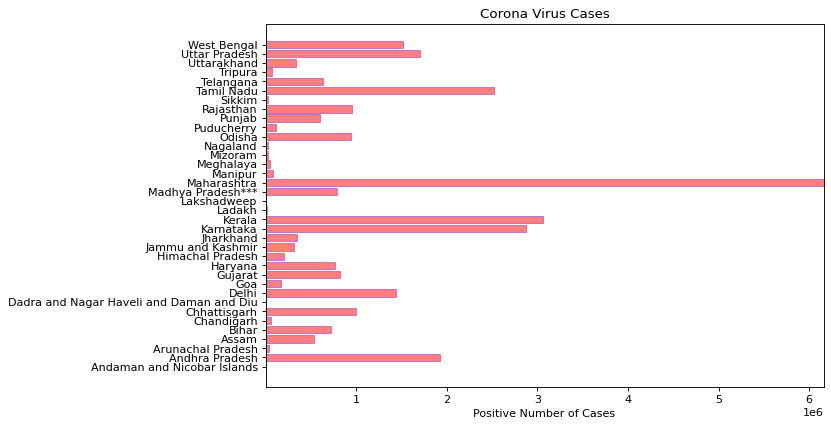

In [59]:
plot_feature('positive')

In [43]:
df.columns
df = df.set_index('state_name', drop = False)
df.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
state_name,,,,,,,,,,
Andaman and Nicobar Islands,Andaman and Nicobar Islands,11,7492,7352,129,9,7493,7355,129,35
Andhra Pradesh,Andhra Pradesh,28680,1922843,1881161,13002,27195,1924421,1884202,13024,28
Arunachal Pradesh,Arunachal Pradesh,3718,39817,35910,189,3918,40383,36274,191,12
Assam,Assam,21319,533663,507516,4828,20941,536238,510432,4865,18
Bihar,Bihar,845,723283,712820,9618,789,723355,712947,9619,10


In [45]:

# df.plot.bar(stacked = True, figsize = (10,10))
df.columns

Index(['state_name', 'active', 'positive', 'cured', 'death', 'new_active',
       'new_positive', 'new_cured', 'new_death', 'state_code'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

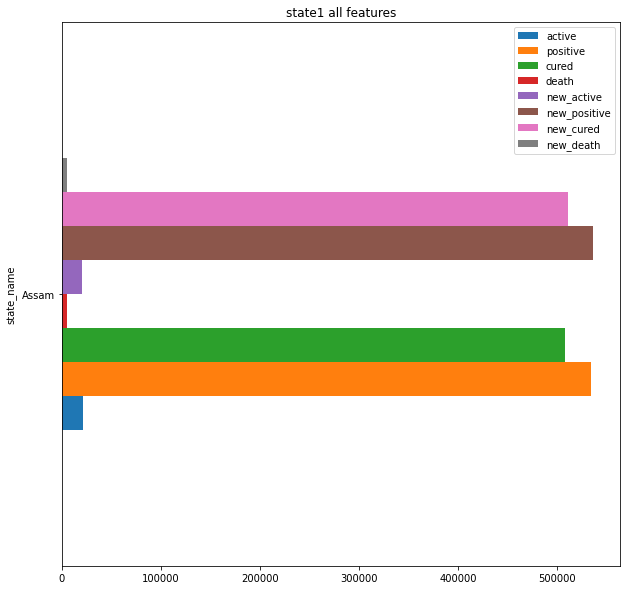

In [65]:
plt.figure()
df[df['state_name'] == 'Assam'].plot.barh(stacked = False, align = 'center',figsize = (10,10))
plt.title('state1 all features')
plt.savefig('./static/img/statwise2.jpg')

<AxesSubplot:ylabel='state_name'>

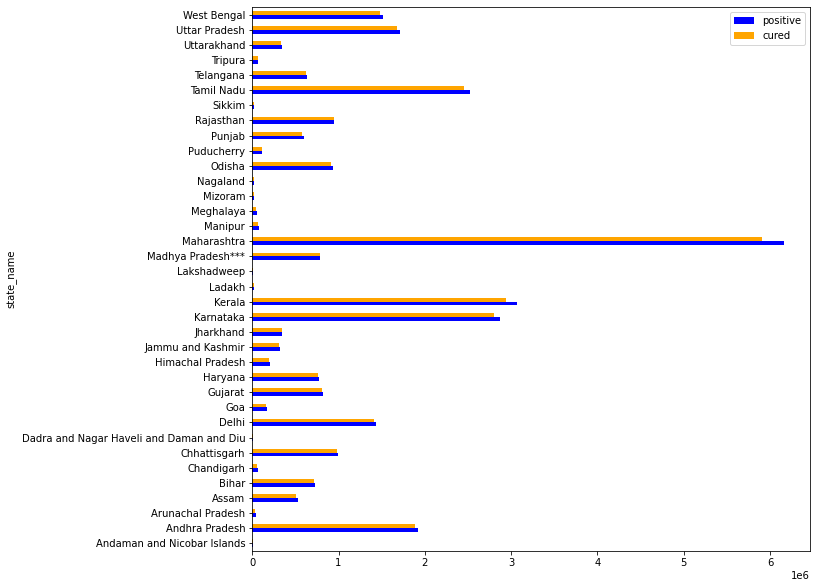

In [16]:
df1=df.iloc[:,1:3]
df1.plot.bar(color={"cured": "orange", "positive": "blue"},figsize=(10,10))

In [66]:
from flask import url_for


In [67]:
url_for('static')

RuntimeError: Attempted to generate a URL without the application context being pushed. This has to be executed when application context is available.